In [1]:
#3
import json # a library used to save and load JSON files
# the file with the symptom mapping
symptom_mapping_file='symptom_mapping_v1.json'
# open the mapping JSON file and load it into a dictionary
with open(symptom_mapping_file) as f:
    mapping=json.load(f)

# print the JSON file
print(json.dumps(mapping, indent=2))

{
  "diseases": {
    "food poisoning": [
      "vomiting",
      "abdominal pain",
      "diarrhea",
      "fever"
    ],
    "kidney stones": [
      "lower back pain",
      "vomiting",
      "fever"
    ],
    "appendicitis": [
      "abdominal pain",
      "vomiting",
      "fever"
    ]
  }
}


In [2]:
def diagnose_v1(patient_symptoms:list):

    diagnosis=[] # قائمة تُستخدم للاحتفاظ بالتشخيصات المحتملة.

    if "vomiting" in patient_symptoms:# اذا كان القيء موجود 

        if "abdominal pain" in patient_symptoms:#اذا كان الم في البطن موجود ايضا  

            if "diarrhea" in patient_symptoms:#اذا كان الاسهال موجود 

                    # تم إضافة تشخيص "التسمم الغذائي" إلى قائمة التشخيصات.
                    diagnosis.append('food poisoning') 

            elif 'fever' in patient_symptoms: #إذا كان "حمى" موجودة

 #يتم إضافة تشخيص "التسمم الغذائي" و"التهاب الزائدة الدودية".
                    diagnosis.append('food poisoning')
                    diagnosis.append('appendicitis')
        #إذا كان "ألم في الظهر السفلي" و"حمى"
        elif "lower back pain" in patient_symptoms and 'fever' in patient_symptoms:

            # يتم إضافة تشخيص "حصى الكلى"
            diagnosis.append('kidney stones')
    #إذا كان "ألم في البطن"، و"إسهال"، و"حمى"
    elif "abdominal pain" in patient_symptoms and\
         "diarrhea" in patient_symptoms and\
         "fever" in patient_symptoms:\
         # يتم إضافة تشخيص "التسمم الغذائي".
         diagnosis.append('food poisoning')

    return diagnosis

In [3]:
my_symptoms=['abdominal pain','fever','vomiting']
diagonsis=diagnose_v1(my_symptoms)
print('Most likely diagnosis',diagonsis)

Most likely diagnosis ['food poisoning', 'appendicitis']


In [4]:
my_symptoms=['vomiting', 'lower back pain', 'fever' ]
diagonsis=diagnose_v1(my_symptoms)
print('Most likely diagnosis',diagonsis)

Most likely diagnosis ['kidney stones']


In [5]:
my_symptoms=['fever', 'cough', 'vomiting']
diagnosis=diagnose_v1(my_symptoms)
print('Most likely diagnosis:',diagnosis)

Most likely diagnosis: []


In [6]:
#الاصدار الثاني 


In [7]:
symptom_mapping_file='symptom_mapping_v2.json'
with open(symptom_mapping_file) as f:
 mapping=json.load(f)

print(json.dumps(mapping, indent=2))

{
  "diseases": {
    "covid19": [
      "fever",
      "headache",
      "tiredness",
      "sore throat",
      "cough"
    ],
    "common cold": [
      "stuffy nose",
      "runny nose",
      "sneezing",
      "sore throat",
      "cough"
    ],
    "flu": [
      "fever",
      "headache",
      "tiredness",
      "stuffy nose",
      "sneezing",
      "sore throat",
      "cough",
      "runny nose"
    ],
    "allergies": [
      "headache",
      "tiredness",
      "stuffy nose",
      "sneezing",
      "cough",
      "runny nose"
    ]
  }
}


In [8]:
def diagnose_v2(patient_symptoms:list,
                symptom_mapping_file:str,
                matching_symptoms_lower_bound:int):

    diagnosis=[]

    with open(symptom_mapping_file) as f:
        mapping=json.load(f)

    
    disease_info=mapping['diseases']

    for disease in disease_info:

        counter=0

        disease_symptoms=disease_info[disease]


        for symptom in patient_symptoms:

            if symptom in disease_symptoms:

                 counter+=1

        if counter>=matching_symptoms_lower_bound:
            diagnosis.append(disease)

    return diagnosis

In [9]:
my_symptoms=["stuffy nose", "runny nose", "sneezing", "sore throat"]
diagnosis=diagnose_v2(my_symptoms,'symptom_mapping_v2.json' , 3)
print('Most likely diagnosis:',diagnosis)

# Patient 2
my_symptoms=["stuffy nose", "runny nose", "sneezing", "sore throat"]
diagnosis=diagnose_v2(my_symptoms, 'symptom_mapping_v2.json' , 4)
print('Most likely diagnosis:',diagnosis)

# Patient 3
my_symptoms=['fever', 'cough', 'vomiting']
diagnosis=diagnose_v2(my_symptoms, 'symptom_mapping_v2.json' , 3)
print('Most likely diagnosis:',diagnosis)

Most likely diagnosis: ['common cold', 'flu', 'allergies']
Most likely diagnosis: ['common cold', 'flu']
Most likely diagnosis: []


In [10]:
#الاصدار الرابع

In [11]:
import pandas as pd
# import pandas to load and process spreadsheet-type data

medical_dataset=pd.read_csv('monkey.csv') 

# load a medical dataset.

medical_dataset

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,3412.0,0.0,5.0,2.0,7.0
1,Portugal,908.0,0.0,0.0,0.0,34.0
2,Spain,7083.0,0.0,13.0,2.0,0.0
3,United States,24403.0,0.0,4.0,41.0,11.0
4,Canada,1388.0,12.0,1.0,5.0,0.0
...,...,...,...,...,...,...
124,Central African Republic,8.0,9.0,0.0,0.0,0.0
125,Republic of Congo,3.0,5.0,0.0,0.0,0.0
126,Cameroon,7.0,27.0,0.0,0.0,0.0
127,Liberia,2.0,0.0,0.0,0.0,0.0


In [12]:
#CREATE MODEL


from sklearn.tree import DecisionTreeClassifier

def diagnose_v4(train_dataset:pd.DataFrame):
    
    # create a Decision Tree Classifier
    model=DecisionTreeClassifier(random_state=1)

    # drop the diagnosis column to get only the symptoms
    train_patient_symptoms=train_dataset.drop(columns=['Country'])

    # get the diagnosis column, to be used as the classification target
    train_diagnoses=train_data['Country']

    # build a decision tree
    model.fit(train_patient_symptoms, train_diagnoses)

    # return the trained model
    return model

In [13]:
#SPLIT DB  


from sklearn.model_selection import train_test_split

# use the function to split the data, get 30% for testing and 70% for training.
train_data, test_data = train_test_split(medical_dataset, test_size=0.02, random_state=0)

#print the shapes (rows x columns) of the two datasets
print(train_data.shape)
print(test_data.shape)

(126, 6)
(3, 6)


['Andorra' 'Argentina' 'Aruba' 'Australia' 'Austria' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bolivia'
 'Bosnia And Herzegovina' 'Brazil' 'Bulgaria' 'Cambodia' 'Cameroon'
 'Canada' 'Cayman Islands' 'Central African Republic' 'Chile' 'China'
 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Curaçao' 'Cyprus'
 'Czech Republic' 'Democratic Republic Of The Congo' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'England' 'Estonia'
 'Fiji' 'Finland' 'France' 'French Guiana' 'Georgia' 'Germany' 'Ghana'
 'Gibraltar' 'Greece' 'Greenland' 'Guadeloupe' 'Guam' 'Guatemala' 'Guyana'
 'Haiti' 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kosovo'
 'Latvia' 'Lebanon' 'Liberia' 'Lithuania' 'Luxembourg' 'Malawi' 'Malaysia'
 'Malta' 'Martinique' 'Mauritius' 'Mexico' 'Moldova' 'Montenegro'
 'Morocco' 'Nepal' 'Netherlands' 'New Caledonia' 'New Zealand' 'Nigeria'
 'Northern Irela

[Text(318.75951008645535, 416.76, 'Suspected_Cases <= 0.5\ngini = 0.992\nsamples = 126\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]'),
 Text(190.1943804034582, 380.52, 'Confirmed_Cases <= 0.5\ngini = 0.987\nsamples = 78\nvalue = [1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0\n1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0\n1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0\n1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0\n1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1\n1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1\n0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1\n0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1]'),
 Text(121.81123919308358, 344.28, 'Travel_Hist

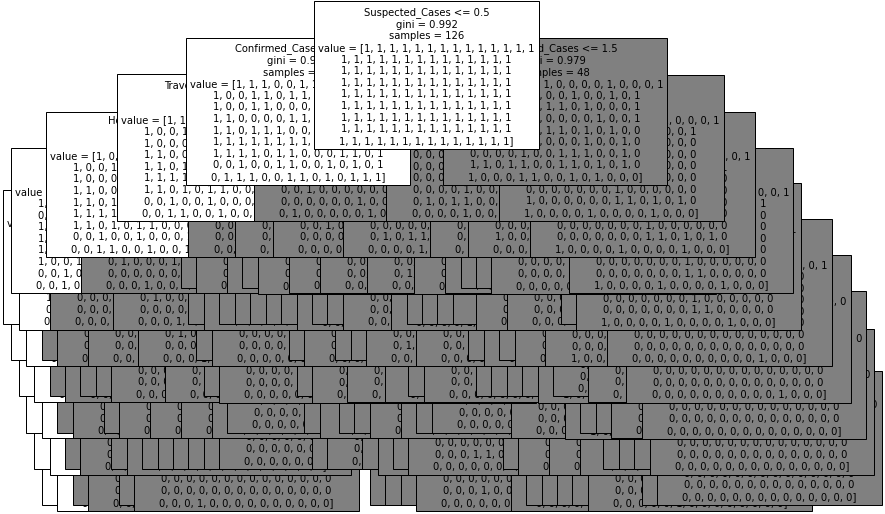

In [14]:
#DRAW DECISION TREE

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
my_tree=diagnose_v4(train_data) # train a model
print(my_tree.classes_) # print the possible target labels (diagnoses)
plt.figure(figsize=(12,8)) # size of the visualization, in inches
# plot the tree
plot_tree(my_tree,
            max_depth=10,
            fontsize=10,
            feature_names=medical_dataset.columns[:-1]
)

In [15]:

#TEST DATA


# functions used to evaluate a classifier
from sklearn.metrics import accuracy_score,confusion_matrix

# drop the diagnosis column to get only the symptoms
test_patient_symptoms=test_data.drop(columns=['Country'])

# get the diagnosis column, to be used as the classification target
test_diagnoses=test_data['Country']

# guess the most likely diagnoses
pred=my_tree.predict(test_patient_symptoms)
print(pred)
# print the achieved accuracy score
accuracy_score(test_diagnoses,pred)

['Finland' 'Serbia' 'Aruba']


0.0

In [16]:
confusion_matrix(test_diagnoses,pred)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0]], dtype=int64)